### 1. Find one of the events in the LIGO/Virgo database. Identify the GPS time and the data rate and download the strain data. Use one of the LIGO detectors data.

In [2]:
# Standard python numerical analysis imports:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json
import sys

# the IPython magic below must be commented out in the .py file, since it doesn't work there.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

pyversion = sys.version_info.major
if pyversion == 2: 
    import urllib2
else:
    import urllib.request

# -- Handy function to download data file, and return the filename
def download(url):
    filename = url.split('/')[-1]
    print('Downloading ' + url )
    if pyversion == 2: 
        r = urllib2.urlopen(url).read()
        f = open(filename, 'w')   # write it to the right filename
        f.write(r)
        f.close()
    else:
        urllib.request.urlretrieve(url, filename)  
    print("File download complete")
    return filename

In [1]:
from gwosc.datasets import find_datasets
events = find_datasets(type='event')
print(events)

['151008', '151012A', '151116', '161202', '161217', '170208', '170219', '170405', '170412', '170423', '170616', '170630', '170705', '170720', 'GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170817', 'GW170818', 'GW170823']


In [41]:
# missing data rate !!

from gwosc.datasets import event_gps
gps = event_gps('GW170817')
print(gps)
t0 = gps

1187008882.4


In [42]:
from gwosc.locate import get_event_urls
urls = get_event_urls('GW170817')
print(urls)

['https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/G-G1_GWOSC_4KHZ_R1-1187008867-32.hdf5', 'https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/H-H1_GWOSC_4KHZ_R1-1187008867-32.hdf5', 'https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/L-L1_GWOSC_4KHZ_R1-1187008867-32.hdf5', 'https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/V-V1_GWOSC_4KHZ_R1-1187008867-32.hdf5', 'https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/G-G1_GWOSC_4KHZ_R1-1187006835-4096.hdf5', 'https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5', 'https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/L-L1_GWOSC_4KHZ_R1-1187006835-4096.hdf5', 'https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/V-V1_GWOSC_4KHZ_R1-1187006835-4096.hdf5']


In [43]:
# -- Use the URL for a data file you found above -- H1
url_H1 = 'https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5'
filename1 = url_H1.split('/')[-1]
download(url_H1)

File download complete


'H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5'

In [79]:
# -- Use the URL for a data file you found above -- V1
url_V1 = 'https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/V-V1_GWOSC_4KHZ_R1-1187006835-4096.hdf5'
filename2 = url_V1.split('/')[-1]
download(url_V1)

File download complete


'V-V1_GWOSC_4KHZ_R1-1187006835-4096.hdf5'

In [44]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 3CD5-360D

 Directory of C:\Users\Laz\Documents\Physics\Computational Physics AUTH (MSc)\Astrophysics\Final

01/07/2019  07:22 ££    <DIR>          .
01/07/2019  07:22 ££    <DIR>          ..
01/07/2019  05:54 ££    <DIR>          .ipynb_checkpoints
01/07/2019  06:35 ££    <DIR>          __pycache__
15/06/2019  09:08 ££            95.761 7. Final_Exercises.pdf
15/06/2019  09:09 ££             8.005 Final_Exercises .ipynb
01/07/2019  07:22 ££           214.393 GW_LIGO.ipynb
01/07/2019  07:22 ££       129.346.425 H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5
01/07/2019  06:23 ££       129.371.075 H-H1_GWOSC_4KHZ_R1-1187527209-4096.hdf5
01/07/2019  06:34 ££            19.244 readligo.py
               6 File(s)    259.054.903 bytes
               4 Dir(s)  52.973.309.952 bytes free


In [45]:
display(filename)
download('https://losc.ligo.org/s/sample_code/readligo.py')

'H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5'

File download complete


'readligo.py'

In [46]:
# LIGO-specific readligo.py 
import readligo as rl


strain, time, chan_dict_H1 = rl.loaddata(filename1, 'H1')

# the time sample interval (uniformly sampled!)
dt = time[1] - time[0]
fs = int(np.round(1/dt))
rel_time = time - t0
display(dt)
display(fs)
display(len(rel_time))
display(rel_time)
display(strain)
#display(chan_dict_H1)

detector = 'H1'

print("Got a sample frequency of {0}".format(fs))
print ("Found {0} seconds of data".format(strain.size*dt))

0.000244140625

4096

16777216

array([-2047.4000001 , -2047.39975595, -2047.39951181, ...,
        2048.59926748,  2048.59951162,  2048.59975576])

array([-1.90953777e-19, -1.76176603e-19, -1.82604103e-19, ...,
       -6.70231357e-19, -6.61236726e-19, -6.77738035e-19])

Got a sample frequency of 4096
Found 4096.0 seconds of data


In [81]:
strain_V1, time_V1, chan_dict_V1 = rl.loaddata(filename2, 'V1')

# the time sample interval (uniformly sampled!)
dt_V1 = time_V1[1] - time_V1[0]
fs_V1 = int(np.round(1/dt_V1))
rel_time_V1 = time - t0
display(dt_V1)
display(fs_V1)
display(len(rel_time_V1))
display(rel_time_V1)
display(strain_V1)

detector = 'V1'

print("Got a sample frequency of {0}".format(fs_V1))
print ("Found {0} seconds of data".format(strain_V1.size*dt_V1))

0.000244140625

4096

16777216

array([-2047.4000001 , -2047.39975595, -2047.39951181, ...,
        2048.59926748,  2048.59951162,  2048.59975576])

array([-2.61070308e-18,  1.90143461e-18,  9.95141793e-19, ...,
       -3.64247841e-19, -3.67173001e-19, -3.65901302e-19])

Got a sample frequency of 4096
Found 4096.0 seconds of data


### 2. Plot the strain data around the GW event

Text(0.5, 1.0, 'strain - V1')

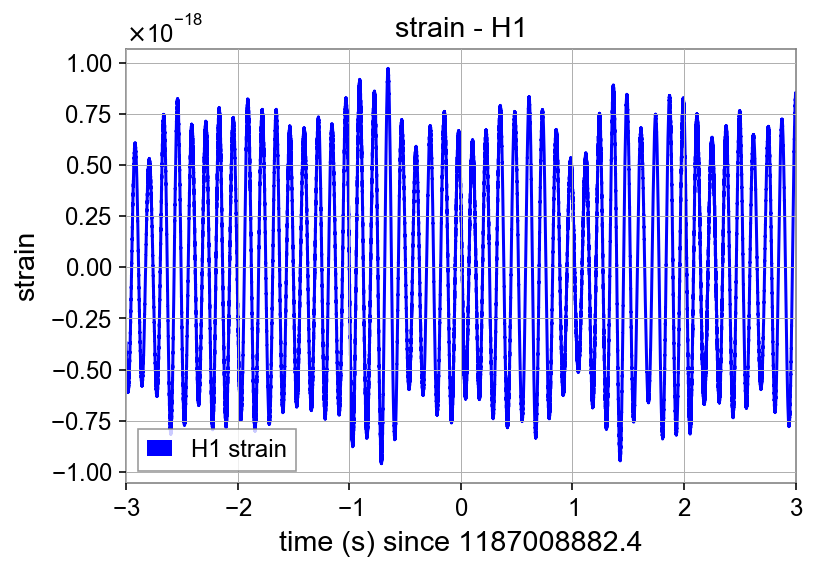

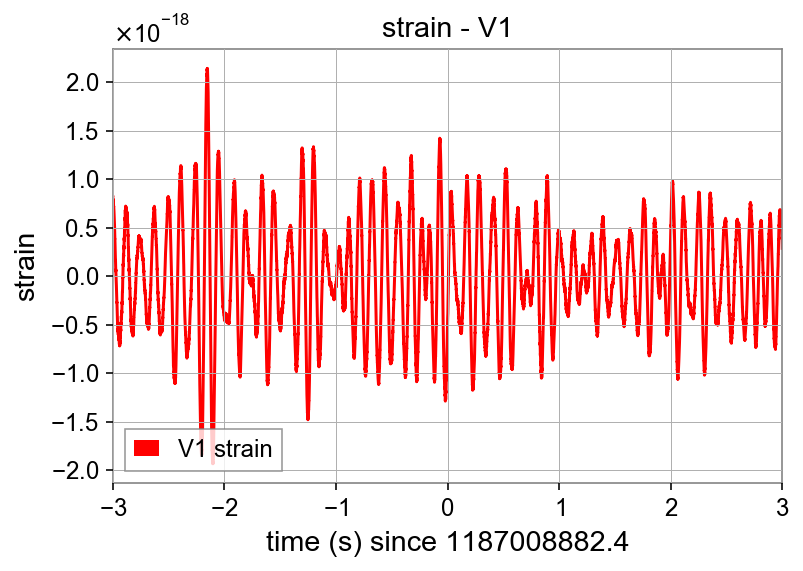

In [152]:
#-- How much data to use for the ASD?
deltat = 3
# Number of seconds on each side of data
N_samp = deltat*fs
N_samp2 = int(np.round(deltat*fs/5))

# -- Center the ASD segment on the requested time
indx = np.where(np.abs(rel_time) < dt)[0][0]

strain_seg = strain[indx-N_samp : indx+N_samp]
strain_seg2 = strain[indx-N_samp2 : indx+N_samp2]
time_seg = rel_time[indx-N_samp : indx+N_samp]

fig1 = plt.figure()
plt.plot(time_seg,strain_seg,'b',label='H1 strain')
plt.xlim([-deltat, deltat])
plt.xlabel('time (s) since '+str(t0))
plt.ylabel('strain')
plt.legend(loc='lower left')
plt.title('strain - H1')

deltat_V1 = 3
N_samp_V1 = deltat_V1*fs_V1
N_samp2_V1 = int(np.round(deltat_V1*fs_V1/5))

indx_V1 = np.where(np.abs(rel_time_V1) < dt_V1)[0][0]

strain_seg_V1 = strain_V1[indx_V1-N_samp_V1 : indx_V1+N_samp_V1]
strain_seg2_V1 = strain_V1[indx_V1-N_samp2_V1 : indx_V1+N_samp2_V1]
time_seg_V1 = rel_time_V1[indx_V1-N_samp_V1 : indx_V1+N_samp_V1]

fig2 = plt.figure()
plt.plot(time_seg_V1,strain_seg_V1,'r',label='V1 strain')
plt.xlim([-deltat_V1, deltat_V1])
plt.xlabel('time (s) since '+str(t0))
plt.ylabel('strain')
plt.legend(loc='lower left')
plt.title('strain - V1')

### 3. Plot the Amplitude Spectral Density
### 4. Explore the effect of the sampling size on the characteristics of the ASD

Text(0.5, 1.0, 'Strain data near 1187008882.4')

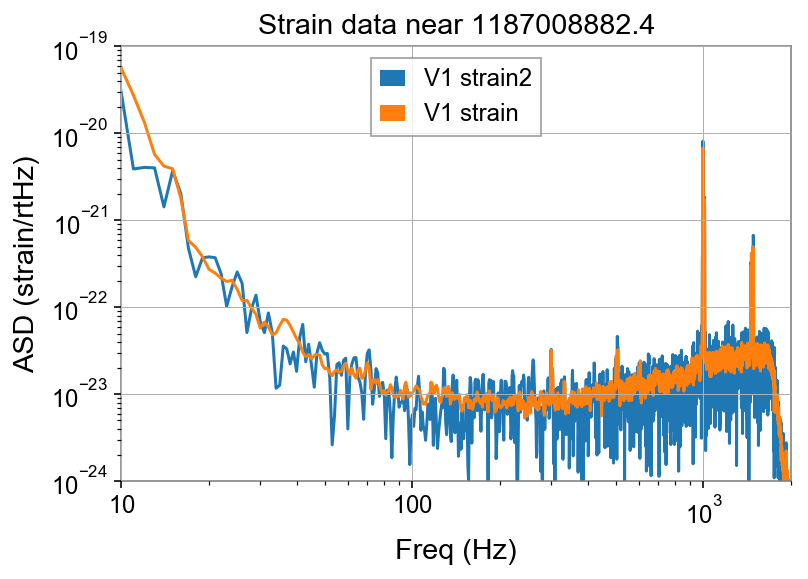

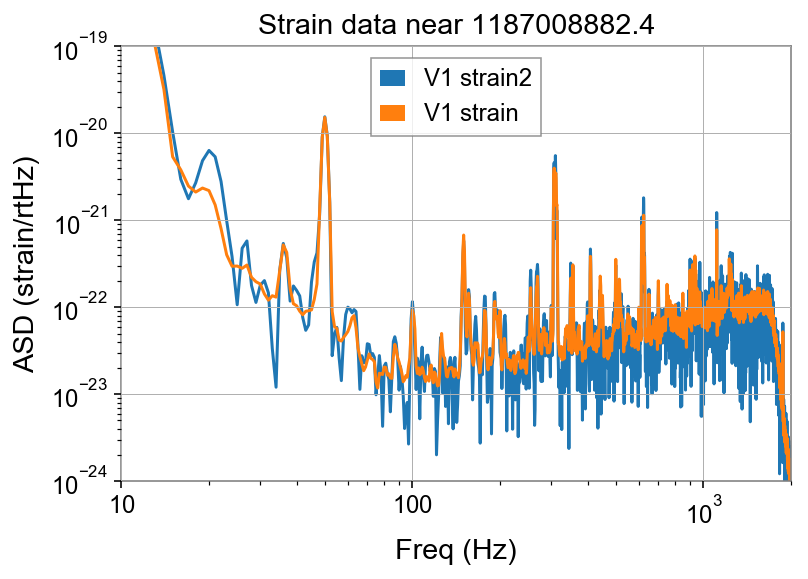

In [153]:
# number of sample for the fast fourier transform:
NFFT = 1*fs
fmin = 10
fmax = 2000
Pxx, freqs = mlab.psd(strain_seg, Fs = fs, NFFT=NFFT, 
                      noverlap=NFFT/2, window=np.blackman(NFFT))

Pxx2, freqs2 = mlab.psd(strain_seg2, Fs = fs, NFFT=NFFT, 
                      noverlap=NFFT/2, window=np.blackman(NFFT))

# We will use interpolations of the ASDs computed above for whitening:
psd = interp1d(freqs, Pxx)
psd2 = interp1d(freqs2, Pxx2)

# plot the ASDs:
fig3 = plt.figure()
plt.loglog(freqs2, np.sqrt(Pxx2),label='{0} strain2'.format(detector))
plt.loglog(freqs, np.sqrt(Pxx),label='{0} strain'.format(detector))
plt.axis([fmin, fmax, 1e-24, 1e-19])
plt.grid('on')
plt.ylabel('ASD (strain/rtHz)')
plt.xlabel('Freq (Hz)')
plt.legend(loc='upper center')
plt.title('Strain data near {0}'.format(t0))
# plt.xlim(200,680)

# number of sample for the fast fourier transform:
NFFT_V1 = 1*fs_V1
fmin_V1 = 10
fmax_V1 = 2000
Pxx_V1, freqs_V1 = mlab.psd(strain_seg_V1, Fs = fs_V1, NFFT=NFFT_V1, 
                      noverlap=NFFT_V1/2, window=np.blackman(NFFT_V1))

Pxx2_V1, freqs2_V1 = mlab.psd(strain_seg2_V1, Fs = fs_V1, NFFT=NFFT_V1, 
                      noverlap=NFFT_V1/2, window=np.blackman(NFFT_V1))

# We will use interpolations of the ASDs computed above for whitening:
psd_V1 = interp1d(freqs_V1, Pxx_V1)
psd2_V1 = interp1d(freqs2_V1, Pxx2_V1)

# plot the ASDs:
fig4 = plt.figure()
plt.loglog(freqs2_V1, np.sqrt(Pxx2_V1),label='{0} strain2'.format(detector))
plt.loglog(freqs_V1, np.sqrt(Pxx_V1),label='{0} strain'.format(detector))
plt.axis([fmin_V1, fmax_V1, 1e-24, 1e-19])
plt.grid('on')
plt.ylabel('ASD (strain/rtHz)')
plt.xlabel('Freq (Hz)')
plt.legend(loc='upper center')
plt.title('Strain data near {0}'.format(t0))
# plt.xlim(410,600)

We observe that as we increase the sampling size, the noise is beeing reduced.

### 5. Apply filters to the data to remove some of the dominant lines.
### 6. Whiten the data
### 7. Comparethe LIGO against the VIRGO results (plot the two ASD against each other)

In [154]:
# function to whiten data
def whiten(strain, interp_psd, dt):
    Nt = len(strain)
    freqs = np.fft.rfftfreq(Nt, dt)

    # whitening: transform to freq domain, divide by asd, then transform back, 
    # taking care to get normalization right.
    hf = np.fft.rfft(strain)
    white_hf = hf / (np.sqrt(interp_psd(freqs) /dt/2.))
    white_ht = np.fft.irfft(white_hf, n=Nt)
    return white_ht
# now whiten the data
strain_whiten = whiten(strain_seg,psd,dt)
strain_whiten_V1 = whiten(strain_seg_V1,psd_V1,dt_V1)

Text(0.5, 1.0, 'WHITENED strain - V1')

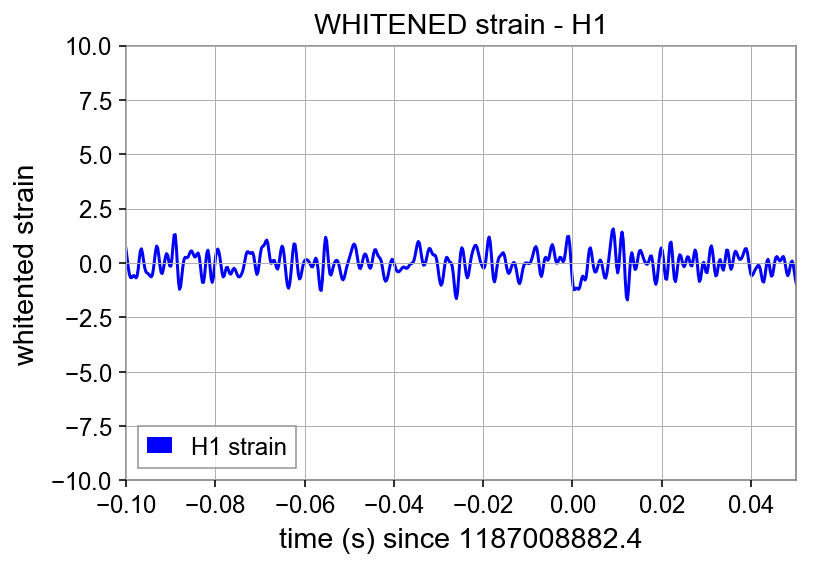

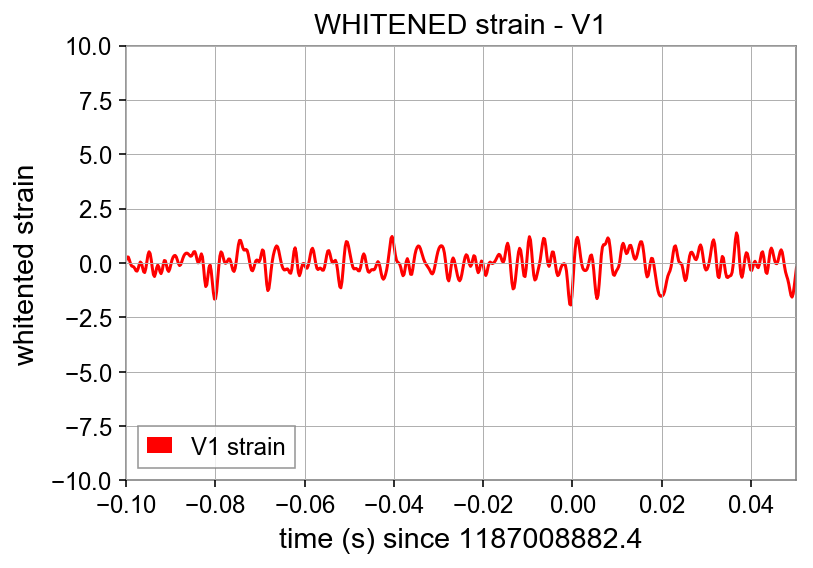

In [155]:
# We need to suppress the high frequencies with some bandpassing:
high_freq = 600.
low_freq  = 30.
bb, ab = butter(4, [low_freq*2./fs, high_freq*2./fs], btype='band')
strain_whitenbp = filtfilt(bb, ab, strain_whiten)

bb_V1, ab_V1 = butter(4, [low_freq*2./fs_V1, high_freq*2./fs_V1], btype='band')
strain_whitenbp_V1 = filtfilt(bb_V1, ab_V1, strain_whiten_V1)

fig5 = plt.figure()
plt.plot(time_seg,strain_whitenbp,'b',label='H1 strain')
plt.xlim([-0.1,0.05])
plt.ylim([-10,10])
plt.xlabel('time (s) since '+str(t0))
plt.ylabel('whitented strain')
plt.legend(loc='lower left')
plt.title('WHITENED strain - H1')

fig6 = plt.figure()
plt.plot(time_seg_V1,strain_whitenbp_V1,'r',label='V1 strain')
plt.xlim([-0.1,0.05])
plt.ylim([-10,10])
plt.xlabel('time (s) since '+str(t0))
plt.ylabel('whitented strain')
plt.legend(loc='lower left')
plt.title('WHITENED strain - V1')

In [156]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from gwpy.signal import filter_design

hdata = TimeSeries(strain_whiten)
hdatabp = TimeSeries(strain_whitenbp)

hdata_V1 = TimeSeries(strain_whiten_V1)
hdatabp_V1 = TimeSeries(strain_whitenbp_V1)

notches = [filter_design.notch(f, fs) for f in (60, 120, 180, 300, 500)]
powernotch = filter_design.concatenate_zpks(*notches)

notches_V1 = [filter_design.notch(f, fs_V1) for f in (25, 50, 100, 150, 175, 310, 410)]
powernotch_V1 = filter_design.concatenate_zpks(*notches_V1)

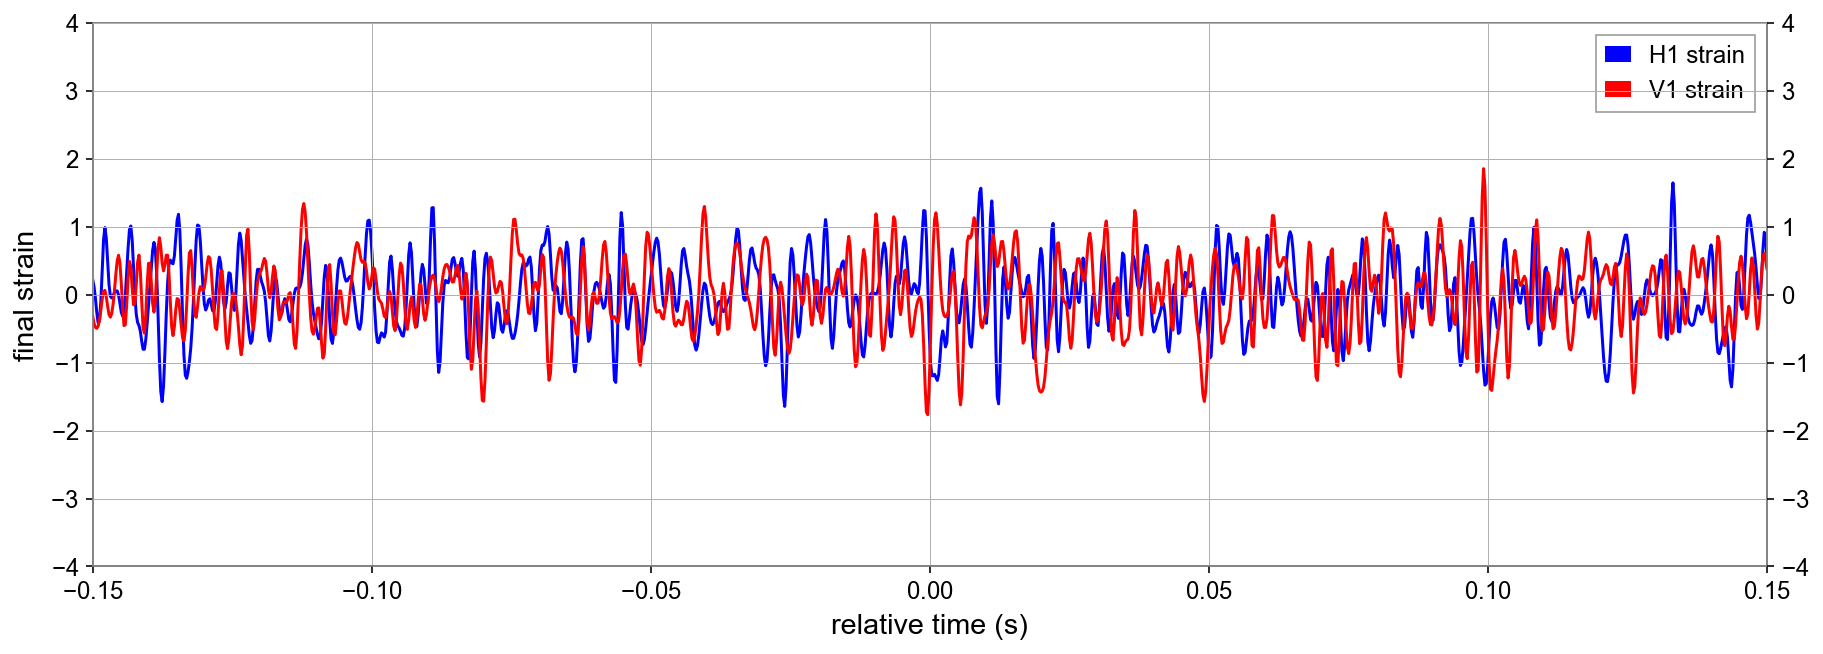

In [173]:
hclean = hdatabp.filter(powernotch, filtfilt=True)
hclean_V1 = hdatabp_V1.filter(powernotch_V1, filtfilt=True)

fig7 = plt.figure(figsize=(15,5))
plt.xlabel(" relative time (s) ")
plt.ylabel(" final strain ")

ax1 = fig7.add_subplot(111)
pH = ax1.plot(time_seg,hclean,'b',label='H1 strain')
ax1.set_epoch(int(gps))
ax1.set_xlim(-0.15,0.15)
# ax1.set_xlim(len(hclean)/2-600, len(hclean)/2+400)
ax1.set_ylim(-4, 4)

ax2 = ax1.twinx()
pV = ax2.plot(time_seg_V1,hclean_V1,'r',label='V1 strain')
ax2.set_epoch(int(gps))
ax2.set_xlim(-0.15,0.15)
# ax2.set_xlim(len(hclean_V1)/2-600, len(hclean_V1)/2+400)
ax2.set_ylim(-4, 4)

lplots = pH+pV
lbls = [l.get_label() for l in lplots]
ax1.legend(lplots,lbls,loc=0)


